In [ ]:
!pip install tensorflow_io
import os

from IPython import display
import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd
from google.colab import drive

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_io as tfio
import librosa

     |████████████████████████████████| 23.4 MB 1.8 MB/s 


In [ ]:
def load_wav_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(
          file_contents,
          desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=1000)
    return wav

#load test file from google drive 
testing_wav_data = load_wav_16k_mono('//content/drive/MyDrive/science fair data/testing data/pixel_heartbeat.wav')

#getting training data(need to change)


small_heart_sounds_csv = 'file:///content/drive/MyDrive/science fair data/csv_file.csv'
base_data_path = 'file:///content/drive/MyDrive/science fair data/heart_sounds/all_sounds'

pd_data = pd.read_csv(small_heart_sounds_csv)
pd_data.head()

#dont change mostly 
my_classes = ['Normal', 'Abnormal']
map_class_to_id = {'Normal':0, 'Abnormal':1}

filtered_pd = pd_data[pd_data.category.isin(my_classes)]

class_id = filtered_pd['category'].apply(lambda name: map_class_to_id[name])
filtered_pd = filtered_pd.assign(target=class_id)

full_path = filtered_pd['filename'].apply(lambda row: os.path.join(base_data_path, row))
filtered_pd = filtered_pd.assign(filename=full_path)

filtered_pd.head(10)

filenames = filtered_pd['filename']
targets = filtered_pd['target']
folds = filtered_pd['fold']

main_ds = tf.data.Dataset.from_tensor_slices((filenames, targets, folds))
main_ds.element_spec

def load_wav_for_map(filename, label, fold):
  return load_wav_16k_mono(filename), label, fold

main_ds = main_ds.map(load_wav_for_map)
main_ds.element_spec


test_pd = filtered_pd.loc[filtered_pd['fold'] == 5]
row = test_pd.sample(1)
arr_files = "a0013.wav","a0031.wav","b0299.wav","e00295.wav","e00935.wav","e00936.wav","e01399.wav","e01421.wav","f0045.wav","f0093.wav"
for x in range(0,10):

  filename = '//content/drive/MyDrive/science fair data/heart_sounds/all_sounds/'+ arr_files[x]  #LINK TO CHANGE WHEN TESTING DIFFERENT DATA
  waveform = load_wav_16k_mono(filename)

  local_path = '/content/drive/MyDrive/hear_sounds_yamnet_1khz'
  reloaded_model = tf .saved_model.load(local_path)

  reloaded_results = reloaded_model(waveform)
  your_top_class = tf.argmax(reloaded_results)
  your_inferred_class = my_classes[your_top_class]
  class_probabilities = tf.nn.softmax(reloaded_results, axis=-1)
  your_top_score = class_probabilities[your_top_class]
  print(f'your heart rythm is: {your_inferred_class} ({your_top_score})')

your heart rythm is: Abnormal (0.9972866773605347)
your heart rythm is: Abnormal (0.9535000324249268)
your heart rythm is: Abnormal (0.9595197439193726)
your heart rythm is: Abnormal (0.9999831914901733)
your heart rythm is: Abnormal (1.0)
your heart rythm is: Abnormal (0.9768834114074707)
your heart rythm is: Abnormal (0.9978768825531006)
your heart rythm is: Normal (0.9996367692947388)
your heart rythm is: Normal (0.998461127281189)
your heart rythm is: Normal (0.9404132962226868)


//content/drive/MyDrive/science fair data/heart_sounds/all_sounds/f0045.wav
Waveform values: [0.         0.         0.         ... 0.03175862 0.02233057 0.04175988]


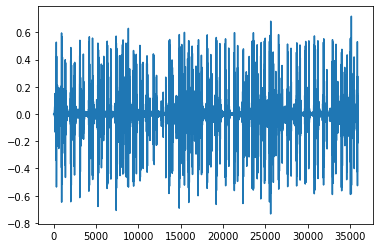

In [ ]:

filename='//content/drive/MyDrive/science fair data/heart_sounds/all_sounds/f0045.wav'
waveform = load_wav_16k_mono(filename)
print(filename)
print(f'Waveform values: {waveform}')
_ = plt.plot(waveform)

display.Audio(waveform, rate=1000)